<a href="https://colab.research.google.com/github/201524495/2021_FSRnT/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from keras.utils import np_utils

from keras.datasets import mnist

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

from google.colab.patches import cv2_imshow

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train : ", np.shape(x_train))
print("y_train : ", np.shape(y_train))

for i in range(10):
    cv2_imshow(x_test[i])

x_train :  (60000, 28, 28)
y_train :  (60000,)


In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')/255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train : ', np.shape(y_train))

x_valid = x_train[50000:]
y_valid = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

print('x_train : ', np.shape(x_train))
print('x_valid : ', np.shape(x_valid))

y_train :  (60000, 10)
x_train :  (50000, 28, 28, 1)
x_valid :  (10000, 28, 28, 1)


In [ ]:
width = 28
height = 28
channel = 1

model = Sequential(name='MINST_CNN')

# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# N차원 배열을 1차원으로 
model.add(Flatten())

# 두 층 MLP
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "MINST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0 

In [ ]:
#categorical_crossentropy : 분류가 2개 이상인 CEE
#optimizer : 학습 방법, SGD 사용
#metrics : 학습 도중 화면에 어떤 값을 띄울지 결정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#모델 학습 시키기
#hist는 Epoch 당 학습 결과를 갖게 된다. 
hist = model.fit(x_train, y_train, 
                 epochs=10, 
                 batch_size=32, 
                 validation_data=(x_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.0235 - accuracy: 0.6786 - val_loss: 0.1013 - val_accuracy: 0.9697
Epoch 2/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0998 - accuracy: 0.9694 - val_loss: 0.0815 - val_accuracy: 0.9769
Epoch 3/10
1563/1563 [==============================] - 137s 87ms/step - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.0944 - val_accuracy: 0.9718
Epoch 4/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 0.0635 - val_accuracy: 0.9811
Epoch 5/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0541 - val_accuracy: 0.9856
Epoch 6/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 7/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0

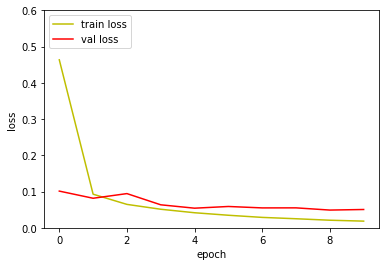

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.ylim([0.0, 0.6])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='upper left')
plt.show()

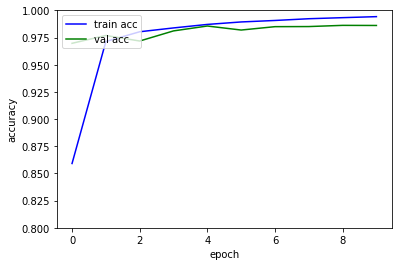

In [ ]:
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

plt.ylim([0.8, 1.0])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(loc='upper left')
plt.show()

In [ ]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0400 - accuracy: 0.9884
Test set Loss and Accuracy
[0.0400090366601944, 0.9883999824523926]


In [ ]:
import random
r = random.randint(0, 1000)

output = model.predict(x_test[r].reshape(1, 28, 28, 1))

cv2_imshow(x_test[r].reshape(28, 28) * 255)

print('정답 : ', np.argmax(y_test[r]))
print('예상 숫자 분류 : ', np.argmax(output))

정답 :  9
예상 숫자 분류 :  9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('\content\drive\My Drive\MINST_CNN.h5')

In [ ]:
del model